In [2]:
# Import All Subsystems
include("../examples/example_functions.jl")
include("../src/FiniteDifference.jl")
include("../src/NumericalContinuation.jl")
include("../src/NumericalShooting.jl")
include("../src/ODESolver.jl")
include("../src/Visualisation.jl")
using PlotlyJS

## Solving a simple ODE

Example 1d ODE Definition:

In [5]:
"""
dx/dt = x
"""

function f(x, t)
    return x
end

f (generic function with 2 methods)

Note: all future functions will be defined in the `example_functions.jl` file inside this folder. 

`solve_ode` returns a timeseries of estimations of the inputted ODE, using the 4th order Runge Kutta method with delta_t as 0.01 for the default values.

In [8]:
t = 0:0.1:1
x0 = [1]

solve_ode(f, x0, t)

11×1 Matrix{Float64}:
 1.0
 1.1051709180665144
 1.221402758139982
 1.3498588075425366
 1.4918246975919556
 1.6487212706320018
 1.8221188003001594
 2.013752707353983
 2.2255409283453305
 2.459603110974011
 2.718281828234402

You can change these default values using keyword arguments:

In [9]:
Δt_max = 0.00001
solve_ode(f, x0, t, method = "euler", Δt = Δt_max)

11×1 Matrix{Float64}:
 1.0
 1.1051703654940122
 1.221401536766096
 1.3498567828026045
 1.4918217140143801
 1.648717148929013
 1.8221133340789506
 2.0137456593964687
 2.225532026408173
 2.4595920430452627
 2.7182682371797497

Let's plot several approximation methods and compare them to the solution:

  0.000462 seconds (3.69 k allocations: 116.797 KiB)
  0.000332 seconds (6.49 k allocations: 291.734 KiB)
  0.000493 seconds (10.22 k allocations: 524.984 KiB)
  0.000544 seconds (7.42 k allocations: 350.047 KiB)
  0.000413 seconds (8.67 k allocations: 427.812 KiB)


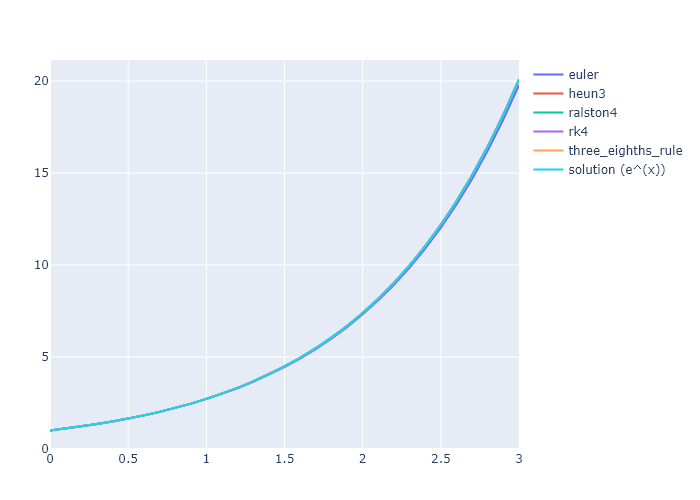

In [9]:
t = 0:0.1:3
x0 = [1]
Δt_max = 0.01

# Solve the ODE with each method, and measure their performance times
@time s1 = solve_ode(f, x0, t, method = "euler", Δt = Δt_max)[:,1]
@time s2 = solve_ode(f, x0, t, method = "heun3", Δt = Δt_max)[:,1]
@time s3 = solve_ode(f, x0, t, method = "ralston4", Δt = Δt_max)[:,1]
@time s4 = solve_ode(f, x0, t, method = "rk4", Δt = Δt_max)[:,1]
@time s5 = solve_ode(f, x0, t, method = "three_eighths_rule", Δt = Δt_max)[:,1]

# Create traces
euler = scatter(x=t, y=s1, mode="lines", name="euler")
heun3 = scatter(x=t, y=s2, mode="lines", name="heun3")
ralston4 = scatter(x=t, y=s3, mode="lines", name="ralston4")
rk4 = scatter(x=t, y=s2, mode="lines", name="rk4")
three_eighths_rule = scatter(x=t, y=s5, mode="lines", name="three_eighths_rule")

# Create solution trace
solution = scatter(x=0:0.01:3, y=exp.(0:0.01:3), mode="lines", name="solution (e^(x))")

# Create plot
plot([euler, heun3, ralston4, rk4, three_eighths_rule, solution])

The Euler method is the only one visibly different from the solution. Let's see why that is by making a plot of each method's error:

For Δt = 0.001: 
Euler approximation = 		2.7169239322358942
Ralston4 approximation = 	2.7182815566175837
Heun3 approximation = 		2.7182818283458725
3/8 Rule approximation = 	2.718281828459023
RK4 approximation = 		2.718281828459023


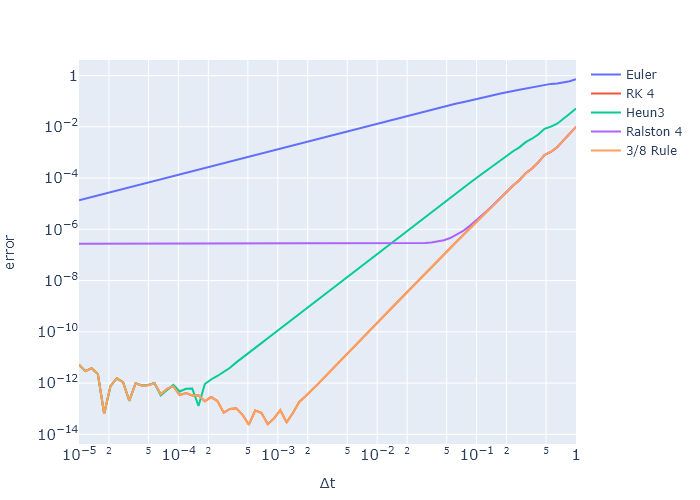

In [14]:
x0 = [1]
t = [0 1]

println("For Δt = 0.001: ")

# Create initial estimates
# Euler estimate of x(1)
solution = solve_ode(f, x0, t; method = "euler", Δt = 0.001)
println("Euler approximation = \t\t", solution[end][1])

# Ralston4 estimate of x(1)
solution = solve_ode(f, x0, t; method = "ralston4", Δt = 0.001)
println("Ralston4 approximation = \t", solution[end][1])

# Heun3 estimate of x(1)
solution = solve_ode(f, x0, t; method = "heun3", Δt = 0.001)
println("Heun3 approximation = \t\t", solution[end][1])

# 3/8 Rule estimate of x(1)
solution = solve_ode(f, x0, t; method = "three_eighths_rule", Δt = 0.001)
println("3/8 Rule approximation = \t", solution[end][1])

# RK4 estimate of x(1)
solution = solve_ode(f, x0, t; method = "rk4", Δt = 0.001)
println("RK4 approximation = \t\t", solution[end][1])


deltat_max = exp10.(range(-5,0,80))
real = ℯ

euler_error = Any[]
heun3_error = Any[]
ralston4_error = Any[]
rk4_error = Any[]
three_eighths_rule_error = Any[]

for value in deltat_max
    euler_sol = solve_ode(f, x0, t, method = "euler", Δt = value)[end][1];
    heun3_sol = solve_ode(f, x0, t, method = "heun3", Δt = value)[end][1];
    ralston4_sol = solve_ode(f, x0, t, method = "ralston4", Δt = value)[end][1];
    rk4_sol = solve_ode(f, x0, t, method = "rk4", Δt = value)[end][1];
    three_eighths_rule_sol = solve_ode(f, x0, t, method = "three_eighths_rule", Δt = value)[end][1];
    push!(euler_error, abs.(euler_sol .- real))
    push!(heun3_error, abs.(heun3_sol .- real))
    push!(ralston4_error, abs.(ralston4_sol .- real))
    push!(rk4_error, abs.(rk4_sol .- real))
    push!(three_eighths_rule_error, abs.(three_eighths_rule_sol .- real))   
end

t1 = scatter(x=deltat_max, y=euler_error, mode="lines", name="Euler")
t2 = scatter(x=deltat_max, y=heun3_error, mode="lines", name="Heun3 ")
t3 = scatter(x=deltat_max, y=ralston4_error, mode="lines", name="Ralston 4")
t4 = scatter(x=deltat_max, y=rk4_error, mode="lines", name="RK 4")
t5 = scatter(x=deltat_max, y=three_eighths_rule_error, mode="lines", name="3/8 Rule")

layout = Layout(
    xaxis_type="log",
    xaxis_exponentformat="power",
    xaxis_title="Δt",
    yaxis_type="log",
    yaxis_exponentformat="power",
    yaxis_title="error",
    width=700, height=350,
    )
data = [t1, t4, t2, t3, t5]

plot(data, layout)

Now, let's time the best and worst methods (rk4 and euler) and see how much longer the euler method takes to get the same accuracy as rk4:

In [13]:
t = [0 1]
x0 = [1]
required_error = 1e-5

deltat_max = 1
method_error = 1
while method_error >= required_error
    deltat_max = deltat_max .* 0.1 
    s1 = solve_ode(f, x0, t, method="euler", Δt=deltat_max)[end][1]
    method_error = abs(ℯ .- s1)
end


rk4_deltat_max = 1
method_error = 1
while method_error >= required_error
    rk4_deltat_max = rk4_deltat_max .* 0.1 
    s1 = solve_ode(f, x0, t, method="rk4", Δt=rk4_deltat_max)[end][1]
    method_error = abs(ℯ .- s1)
end
println("For Euler error less than ", required_error, ", delta_t should be: ", round(deltat_max; digits=9))
println("For RK4 error less than ", required_error, ", delta_t should be: ", round(rk4_deltat_max; digits=9))


@time s1 = solve_ode(f, x0, t, method="euler", Δt=deltat_max)[end][1];
println("\nEuler method error: ", abs(ℯ .- s1))
@time s2 = solve_ode(f, x0, t, method="rk4", Δt=rk4_deltat_max)[end][1];
println("RK4 method error: ", abs(ℯ .- s2))

For Euler error less than 1.0e-5, delta_t should be: 1.0e-6
For RK4 error less than 1.0e-5, delta_t should be: 0.1
  0.735389 seconds (11.00 M allocations: 335.694 MiB, 3.88% gc time)

Euler method error: 1.3591610961150025e-6
  0.000063 seconds (262 allocations: 12.453 KiB)
RK4 method error: 2.0843238788259555e-6


## ODE Systems
Example 2d ODE:

In [14]:
"""
System of equations definitions for
    d^2x/dt^2 = -x,
equivalent to the system of equations
    dx/dt = y and dy/dt = -x.
"""

function f2(u, t)

    if(!isapprox(length(u), 2.0; atol=eps(Float64), rtol=0))
        throw(error("Please make sure you have entered two initial conditions for the function."))
    end

    x = u[1]    
    y = u[2]
    
    x_dot = y
    y_dot = -x
    
    return [x_dot y_dot]
end

function f2_solution(u, t)

    c1 = u[2]
    c2 = u[1]

    x = c1*sin.(t) + c2*cos.(t)
    y = c1*cos.(t) - c2*sin.(t)

    return [x y]
end

f2_solution (generic function with 2 methods)

Generate solution and estimate data for error plots

In [15]:
u = [0 0]
t = 0:0.1:10
real_t = 0:0.1:10
s = solve_ode(f2, u, t, method="rk4", Δt=0.001);
real_s = f2_solution(u, real_t);

x = s[:,1];
x_dot = s[:,2];
x_sol = real_s[:,1];
x_dot_sol = real_s[:,2];

Plot of solution and estimate for x versus t

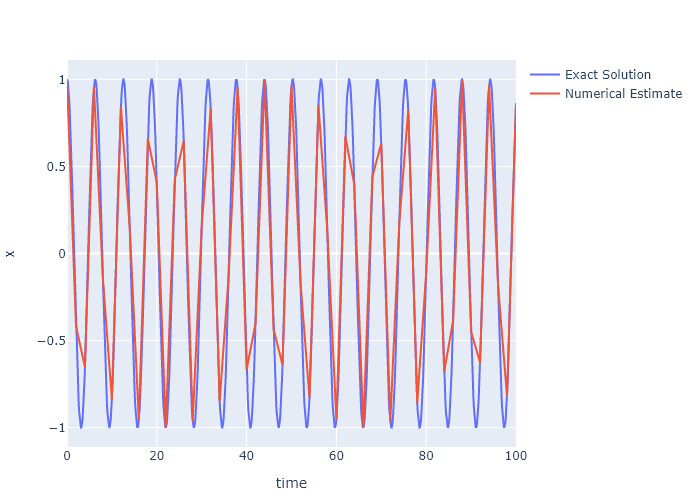

In [3]:
# Increase the step size of t to see the correct behaviour.

u = [1 0]
t = 0:2:100


s = solve_ode(f2, u, t, method="rk4", Δt=0.001);
exact_solution = f2_solution(u, 0:0.1:100);

x = s[:,1];
x_dot = s[:,2];
x_sol = exact_solution[:,1];
x_dot_sol = exact_solution[:,2];

solution = scatter(x=0:0.1:100, y=x_sol, mode="lines",name="Exact Solution")
estimate = scatter(x=t, y=x, mode="lines",name="Numerical Estimate")

layout = Layout(
    xaxis_title="time",
    yaxis_title="x",
    width=700, height=350,
    )

plot([solution, estimate], layout)

Plot of solution and estimate for x versus x_dot

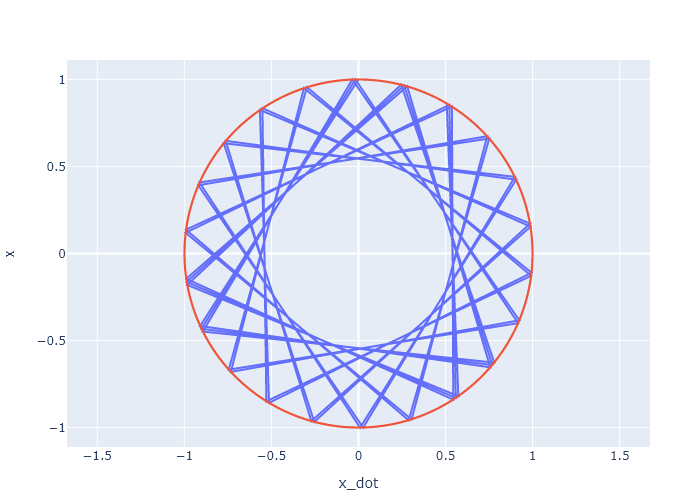

In [5]:
estimate = scatter(x=x_dot, y=x, mode="lines",name="Numerical Estimate")
solution = scatter(x=x_dot_sol, y=x_sol, mode="lines",name="Exact Solution")
layout = Layout(
    yaxis=attr(scaleanchor = "x",scaleratio = 1),
    xaxis_title="x_dot",
    yaxis_title="x",
    width=500, height=350,
    showlegend=false,
)

plot([estimate, solution], layout)